__Name: Sharon Sam S__

# Learn and Build  

# Task-2 : Machine Learnig model - Profit of a Company

#### __Problem Statement:__

`Train a machine learning model so that it's capable of predicting the profit of a company after their expense.`

__Agenda:__
    
* `Import necessary libraries and dataset`

* `Explore the data by printing the properties`

* `Extraction of input and output features from dataset`

* `Converting categorical feature to numeric`

* `Split the dataset with 20% as test data`

* `Normalizations using Standard Scaler and MinMax Scaler`

* `Model Building using Linear, Ridge, Lasso Regressor models`

* `Model Evaluation using r2 score and root mean squared error`

* `Model Evaluation without Catergorical feature`

* `Best Model Selection and Evaluation`

* `Visualization of Regression Model`

* `Predicted Values`

### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math
from math import sqrt

import time
from time import process_time

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import *

### Import Dataset

In [2]:
df = pd.read_csv("50_Startups (1).csv")

### Properties of the dataset

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
print("There are", df.shape[0], "samples and", df.shape[1], "features with totally", df.size, "elements in the dataset")

There are 50 samples and 5 features with totally 250 elements in the dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


`We see that the data contains:`

__4 input features:__

    - R&D Spend
    - Administration
    - Marketing Spend
    - State 

__1 output feature:__

    - Profit
    
__Missing Values:__
    
    There are no missing values in the dataset

### Descriptive Stats of the dataset

In [7]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [8]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

### Extraction of input and output features from dataset

In [9]:
X = df.drop(['Profit'], axis=1)

y = df['Profit']

### Converting categorical feature to numeric

In [10]:
X = pd.get_dummies(X)

In [11]:
X.head(3)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0


In [12]:
y.head(3)

0    192261.83
1    191792.06
2    191050.39
Name: Profit, dtype: float64

### Split the dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print("Shape of training set:")
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("\n")
print("Shape of testing set:")
print("X_test", X_test.shape)
print("y_test", y_test.shape)

Shape of training set:
X_train (40, 6)
y_train (40,)


Shape of testing set:
X_test (10, 6)
y_test (10,)


### Model Building and Evaluation

In [14]:
ss_lr = [('ss', StandardScaler()), ('lr', LinearRegression())]
mm_lr = [('mm', MinMaxScaler()), ('lr', LinearRegression())]

ss_rr = [('ss', StandardScaler()), ('rr', Ridge())]
mm_rr = [('mm', MinMaxScaler()), ('rr', Ridge())]

ss_ls = [('ss', StandardScaler()), ('ls', Lasso())]
mm_ls = [('mm', MinMaxScaler()), ('ls', Lasso())]

models = { 
    "Linear Regression": LinearRegression(),
    "Linear Regression with StandardScaler": Pipeline(ss_lr),
    "Linear Regression with MinMaxScaler": Pipeline(mm_lr), 
    "Ridge Regression with StandardScaler": Pipeline(ss_rr),
    "Ridge Regression with MinMaxScaler": Pipeline(mm_rr),  
    "Lasso Regression with StandardScaler": Pipeline(ss_ls),
    "Lasso Regression with MinMaxScaler": Pipeline(mm_ls),
}

In [15]:
no_models = len(models.keys())

def build(X_train, X_test, y_train, y_test, verbose = True):
    
    df_results = pd.DataFrame(data=np.zeros(shape=(no_models, 4)), columns = ['Models','r2 Score','RMSE','Training time'])
    
    count = 0
    for key, model in models.items():
        
        t_start = process_time()  
        model.fit(X_train, y_train)
        
        t_stop = process_time() 
        t_elapsed = t_stop - t_start
        
        y_pred = model.predict(X_test)
        
        df_results.loc[count,'Models'] = key
        df_results.loc[count,'r2 Score'] = r2_score(y_test, y_pred)
        df_results.loc[count,'RMSE'] = sqrt(mean_squared_error(y_test, y_pred))
        df_results.loc[count,'Training time'] = t_elapsed
        
        count+=1

    return df_results

In [16]:
df_results = build(X_train, X_test, y_train, y_test)
df_results.sort_values(by='r2 Score', ascending=False)

,Models,r2 Score,RMSE,Training time
6,Lasso Regression with MinMaxScaler,0.934799,9131.545532,0.000000
5,Lasso Regression with StandardScaler,0.934751,9134.908928,0.000000
1,Linear Regression with StandardScaler,0.934707,9137.990153,0.015625
0,Linear Regression,0.934707,9137.990153,0.031250
2,Linear Regression with MinMaxScaler,0.934707,9137.990153,0.000000
3,Ridge Regression with StandardScaler,0.922005,9987.379478,0.015625
4,Ridge Regression with MinMaxScaler,0.802018,15912.169060,0.000000


### Model Evaluation without Catergorical feature

In [17]:
del df['State']

In [18]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [19]:
X_wc = df.drop(['Profit'], axis=1)
y_wc = df.Profit

In [20]:
X_train_wc, X_test_wc, y_train_wc, y_test_wc = train_test_split(X_wc, y_wc, test_size = 0.2, random_state=0)

print("Shape of training set:")
print("X_train_wc", X_train_wc.shape)
print("y_train_wc", y_train_wc.shape)
print("\n")
print("Shape of testing set:")
print("X_test_wc", X_test_wc.shape)
print("y_test_wc", y_test_wc.shape)

Shape of training set:
X_train_wc (40, 3)
y_train_wc (40,)


Shape of testing set:
X_test_wc (10, 3)
y_test_wc (10,)


In [21]:
df_results_wc = build(X_train_wc, X_test_wc, y_train_wc, y_test_wc)
df_results_wc.sort_values(by='r2 Score', ascending=False)

,Models,r2 Score,RMSE,Training time
6,Lasso Regression with MinMaxScaler,0.939452,8799.683636,0.015625
5,Lasso Regression with StandardScaler,0.939419,8802.055082,0.000000
0,Linear Regression,0.939396,8803.775790,0.000000
1,Linear Regression with StandardScaler,0.939396,8803.775790,0.015625
2,Linear Regression with MinMaxScaler,0.939396,8803.775790,0.000000
3,Ridge Regression with StandardScaler,0.930196,9448.341344,0.000000
4,Ridge Regression with MinMaxScaler,0.837549,14413.798185,0.015625


# Best Model 

__Lasso Regression with MinMaxScaler with highest `r2 score = 0.93479` and with lowest `RMSE = 9131.545532`__

In [22]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

model = Lasso()

model.fit(scaled_X_train, y_train)

model_y_pred = model.predict(scaled_X_test)

print("Model Results:\n")
print("Accuracy of the best Model =", r2_score(y_test, model_y_pred))
print("Residual Error of the best Model =", sqrt(mean_squared_error(y_test, model_y_pred)))
print("\n")
print("Values of Model Parameters:\n")
print("  Coefficient", model.coef_)
print("  Intercept", model.intercept_)

Model Results:

Accuracy of the best Model = 0.9347989116076313
Residual Error of the best Model = 9131.545531817224


Values of Model Parameters:

  Coefficient [127915.66626727   3476.09108902  17239.72658993   -163.93952875
  -1117.95560885    530.96949839]
  Intercept 44424.14888376119


### Visualization

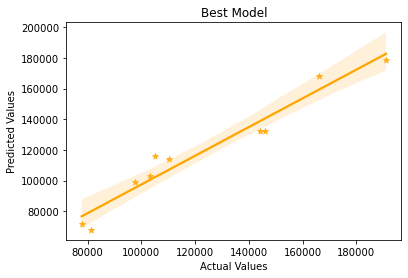

In [23]:
sns.regplot(x=y_test, y=model_y_pred, color='orange', marker='*')
plt.title("Best Model")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Predicted Values

In [24]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':model_y_pred,'Difference':y_test-model_y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28,103282.38,103012.757141,269.622859
11,144259.40,132590.267587,11669.132413
10,146121.95,132458.485208,13663.464792
41,77798.83,71986.400650,5812.429350
2,191050.39,178545.366196,12505.023804
27,105008.31,116145.773357,-11137.463357
38,81229.06,67853.841987,13375.218013
31,97483.56,98787.436354,-1303.876354
22,110352.25,113968.483774,-3616.233774
4,166187.94,167932.324602,-1744.384602
